1. Import Libraries
2. Data understanding
3. Data Visualization
    - Histograms
    - Pie
    - Bar Plots
    - Factor Plot
    - Heatmap
    - Scatter plot
    - Line Plot
4. Data Cleaning
5. Checking the outliers

## Titanic Dataset

## 1. Import the Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",None)

## 2. Data Understanding

In [2]:
# loading the data
df = pd.read_csv("train.csv")

In [3]:
# let us observe the top few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# let u observe last few rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# let us see the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# let us see the spread of the dataset
df.describe() # By Default it will give description of all the numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Hypothesis : The children who are less than 2 years old are travelling free of cost.

In [9]:
# checking the above hypothesis
df[df['Fare']==0].sort_values(by='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S


- The above mentioned Hypothesis is not satisfying.

In [12]:
df[df['Ticket'] =="239853"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S


In [13]:
df.sort_values(by='Age').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [15]:
# see the descriptive statistics of object columns
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nakid, Mr. Sahid",male,347082,B96 B98,S
freq,1,577,7,4,644


In [17]:
df.groupby('Ticket')['Ticket'].count()

Ticket
110152                3
110413                3
110465                2
110564                1
110813                1
111240                1
111320                1
111361                2
111369                1
111426                1
111427                1
111428                1
112050                1
112052                1
112053                1
112058                1
112059                1
112277                1
112379                1
113028                1
113043                1
113050                1
113051                1
113055                1
113056                1
113059                1
113501                1
113503                1
113505                2
113509                1
113510                1
113514                1
113572                2
113760                4
113767                1
113773                1
113776                2
113781                4
113783                1
113784                1
113786                1
113787   

In [19]:
df[df['Ticket']=='110152'] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


- Hypothesis : It could be possible that multiple people are travlleing on same ticket and the could be friends.

In [22]:
df.describe(percentiles = [.01,.05,.25,.50,.75,.90,.95,.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
1%,9.900000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
5%,45.500000,0.000000,1.000000,4.000000,0.000000,0.000000,7.225000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300


In [23]:
df.sort_values(by='Fare',ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C


- Fare :512.392 having ticket number PC 17755 seems to be outlier in our dataset

<AxesSubplot:xlabel='Fare'>

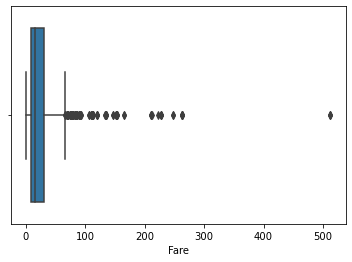

In [28]:
sns.boxplot(df['Fare'])

Upper whiskers = 75% - 75% *1.5<br>
Lower Whiskers = 25% - 25%*1.5

In [32]:
temp_df = df[df['Fare'] <512.3292]

In [33]:
temp_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,29.675345,0.524775,0.381757,30.582164
std,257.405474,0.486091,0.834007,14.552495,1.104186,0.806949,41.176366
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


<AxesSubplot:xlabel='Fare'>

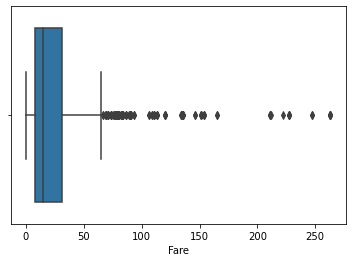

In [34]:
sns.boxplot(temp_df['Fare'])

<AxesSubplot:xlabel='Fare'>

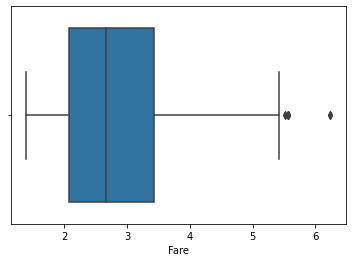

In [36]:
sns.boxplot(np.log(df['Fare'])) # plotting on df

<AxesSubplot:xlabel='Fare'>

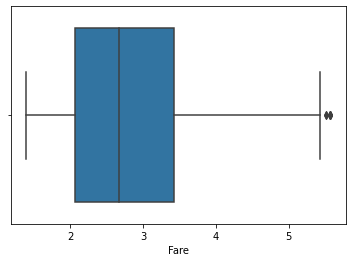

In [37]:
sns.boxplot(np.log(temp_df['Fare'])) # plotting on temp_df where we have remove the fare 512.3292

In [39]:
# Check the missing values
round((df.isnull().sum()/len(df))*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

- Imputation Methods(Basics) : 
    - Mean
    - Mode
    - Median
    - BackFill
    - Forward Fill

## EDA

## 1. How many people survived.?

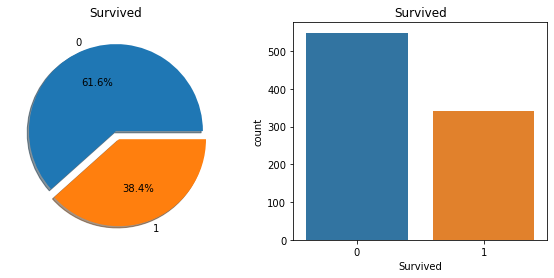

In [43]:
f, ax =  plt.subplots(1,2,figsize=(10,4))

df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

sns.countplot("Survived",data=df,ax=ax[1])
ax[1].set_title("Survived")

plt.show()

## How many male and Female Survived.?

In [60]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [62]:
# on an average ow many male and female survived
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


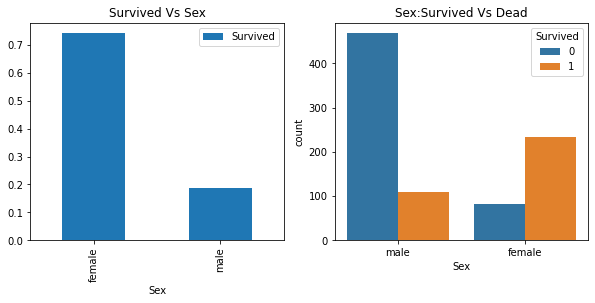

In [64]:
f, ax = plt.subplots(1,2,figsize=(10,4))
df[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived Vs Sex")

sns.countplot('Sex',hue='Survived', data =df, ax = ax[1])
ax[1].set_title("Sex:Survived Vs Dead")
plt.xticks()

plt.show()

- Almost 62% of passengers died in the ship
- The overall survival rate is 32%
- The female Vs Male survial ratio is 75:19
- The female survival rate is high and death rate is low as compare to males.

### 3. In which class how many people survived and also I want to analyse how Pclass (ordinary variable/feature) have the impact on the survival ratio?

In [67]:
pd.crosstab(df.Pclass,df.Survived,margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


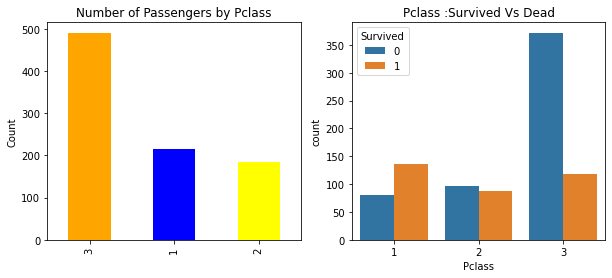

In [71]:
f, ax = plt.subplots(1,2,figsize=(10,4))
df['Pclass'].value_counts().plot.bar(color = ['orange','blue','yellow'],ax=ax[0])
ax[0].set_title("Number of Passengers by Pclass")
ax[0].set_ylabel("Count")

sns.countplot("Pclass",hue='Survived', data =df, ax=ax[1])
ax[1].set_title("Pclass :Survived Vs Dead")
plt.show()


## 3.In each Class how many males and females survived?

In [74]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

- All the males were focusing on saving the female candidates/ priorities were given to female candiidates

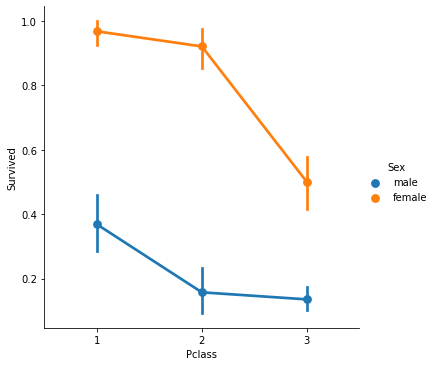

In [76]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

# Conitnuous Feature : Fare

## 1. How my fare is moving on basis of Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

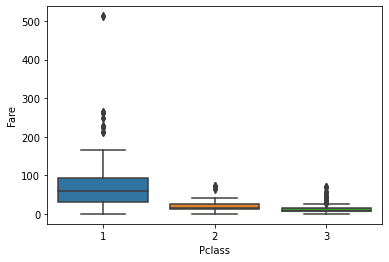

In [77]:
sns.boxplot("Pclass","Fare",data =df)

## 2. How my age is disctributed withing each class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

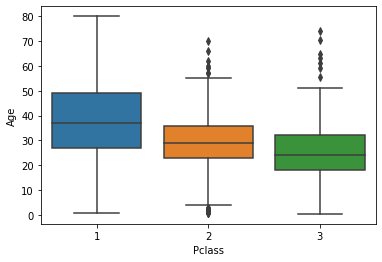

In [78]:
sns.boxplot("Pclass","Age",data=df)

In [80]:
df[df['Age']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


## 3. How many people survived in each class on the basis of Age

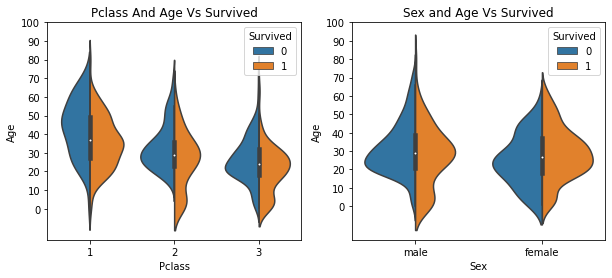

In [82]:
f, ax = plt.subplots(1,2,figsize=(10,4))
sns.violinplot("Pclass","Age",hue="Survived", data=df, ax=ax[0],split=True)
ax[0].set_title("Pclass And Age Vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue ="Survived", data = df, ax=ax[1], split=True)
ax[1].set_title("Sex and Age Vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

In [86]:
df[(df['Age']<10) & (df['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S


## Name Feature

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initals
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [91]:
# Regex functions : It will help us to identify the pattern
df.Name.str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [111]:
# extract the salutations
df['Initals'] = 0
for cols in df :
    df['Initals'] = df.Name.str.extract('([A-Za-z]+)\.')

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initals
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [113]:
pd.crosstab(df.Initals,df.Sex).T.style.background_gradient(cmap='summer_r')

Initals,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [114]:
df[df['Name'].str.contains('Mlle')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initals
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle


In [115]:
df[df['Name'].str.contains('Mme')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initals
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,Mme


In [116]:
df[df['Name'].str.contains('Major')]['Name']

449       Peuchen, Major. Arthur Godfrey
536    Butt, Major. Archibald Willingham
Name: Name, dtype: object

In [119]:
df['Initals'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [120]:
df.groupby('Initals')['Age'].mean()

Initals
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Imputation